# Исследование надежности заемщиков


## Описание проекта

***
**Заказчик** - кредитный отдел банка. Необходимо разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

**Входные данные от банка** — статистика о платёжеспособности клиентов.

**Результаты исследования** будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
***
**Последовательность действий**
- Шаг 1. Изучение полученных данных.
  - Откроем полученный датасет. Путь к файлу: `/datasets/data.csv`.
  - Изучим основную информацию по датасету

- Шаг 2. Предобработка данных:
  - Удаление пропусков;
  - Обработка аномальных значений;
  - Изменение типов данных;
  - Обработка дубликатов;
  - Категоризация данных.
- Шаг 3. Ответы на вопросы
  - Есть ли зависимость между количеством детей и возвратом кредита в срок?
  - Есть ли зависимость между семейным положением и возвратом кредита в срок?
  - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
  - Как разные цели кредита влияют на его возврат в срок?
  - Приведем возможные причины появления пропусков в исходных данных.
  - Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.
- Шаг 4. Общий вывод.
***
**Описание данных**

- **`children`** — количество детей в семье;
- **`days_employed`** — общий трудовой стаж в днях;
- **`dob_years`** — возраст клиента в годах;
- **`education`** — уровень образования клиента;
- **`education_id`** — идентификатор уровня образования;
- **`family_status`** — семейное положение;
- **`family_status_id`** — идентификатор семейного положения;
- **`gender`** — пол клиента;
- **`income_type`** — тип занятости;
- **`debt`** — имел ли задолженность по возврату кредитов;
- **`total_income`** — ежемесячный доход;
- **`purpose`** — цель получения кредита.
***


## Шаг 1. Изучение полученных данных.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn

import warnings
warnings.filterwarnings("ignore")

In [2]:
# откроем полученный датасет
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
# выведим первые 20 строк датасета data
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# выведим основную информацию о датасете с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Итог.** По полученной информации о датасете можем зафиксировать следующее:
- в датасете представлено 21525 записи;
- в датасете имеются следющие типы данных:
  - `int64` — целочисленными колонками являются:
    - `children` — количество детей в семье;
    - `dob_years` — возраст клиента в годах;
    - `education_id` — идентификатор уровня образования;
    - `family_status_id` — идентификатор семейного положения;
    - `debt` — имел ли задолженность по возврату кредитов.
  - `float64` — колонки со значениями действительных чисел являются:
    - `days_employed` — общий трудовой стаж в днях;
    - `total_income` — ежемесячный доход.
  - `object` - текстовыми колонками являются:
    - `education` — уровень образования клиента;
    - `family_status` — семейное положение;
    - `gender` — пол клиента;
    - `income_type` — тип занятости;
    - `purpose` — цель получения кредита.
- в колонках `days_employed` и `total_income` присутствуют пропуски, необходимо их проверить и принять решение об их удалении из датасет.

## Шаг 2. Предобработка данных

### Удаление пропусков

На первом шаге мы обнаружили в колонках `days_employed` (общий трудовой стаж) и `total_income` (ежемясчный доход) имеются пропуски. Изучим количество пропущенных значений для каждого столбца.

In [5]:
# посчитаем сумму пропусков для каждого столбца датасета
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Итог:** в колонках `days_employed` (общий трудовой стаж) и `total_income` (ежемясчный доход) по 2174 пропуска.

Предлагаю пропуки в колонке `total_income` заполнить медианным значениями, так как на ежемесячный доход сильнее всего влияет тип занятости (столбец `income_type`).

Колонку `days_employed` заполним на следующем этапе.

In [6]:
# пропуски в колонке 'total_income' заполним медианным значением
# по каждому типу занятости, указанному в колонке 'income_type'

for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [7]:
# выполним проверку на пропуски
print('Количество пропусков в колонке \'total_income\':', data['total_income'].isna().sum())

Количество пропусков в колонке 'total_income': 0


### Обработка аномальных значений

В представленных данных могут встречаться аномальные значения — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными.

In [8]:
#выполним замену отрицательных значений на положительные в колонке 'days_employed'
data['days_employed'] = data['days_employed'].abs()

In [9]:
# выведим для каждого типа занятости медианное значение трудового стажа
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Итог:** У двух типов занятости - `безработные` и `пенсионеры`, наблюдаем аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Предлагаю выполнить проверку аномальных значений также в колонке `children` (количество детей).

In [10]:
# выведим уникальные значения в колонке 'children'
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Итог:** в колонке `children` наблюдаем два аномальных значения `-1` и `20`. Данные аномалии могли возникнуть по ошибке пользователя, который заполнял данные о себе. Предлагаю строки, в которых встречаются данные значения удалить из нашего датасета.

In [11]:
# фильтруем датасет и оставляем строки, в которых в колонке 'children' не встречаются значения -1 и 20
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [12]:
# выполним проверку удаления аномальных значений и выведим уникальные значения колонки 'children'
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Вернемся к заполнению пропусков. Как ранее было определено в столбце `days_employed` имеются пропуски в количестве 2174. Зполним медианными значениями по каждому типу занятости `income_type`.

In [13]:
# пропуски в колонке 'days_employed' заполним медианным значением
# по каждому типу занятости, указанному в колонке 'income_type'

for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [14]:
# выполним проверку на пропуски
print('Количество пропусков в колонке \'days_employed\':', data['days_employed'].isna().sum())

Количество пропусков в колонке 'days_employed': 0


In [15]:
# проверим наличие пропусков по всему датасету
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

В колонке `total_income` представлены значения об ежемесячном доходе клиента. На данный момент значения в колонке представлены как вещественный тип. Для последующего анализа предлагаю значения данной колонки перевести в целочисленный тип.

In [16]:
# выполним преобразование значений из float64 в int64 в колонке 'total_income'
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

В колонке `education` (уровень образования клиента) мы могли наблюдать, что одни и те же значения записаны по разному: с использованием заглавных и строчных букв. Предлагаю их изучить и привести к нижнему регистру.

In [17]:
# выведим уникальные значения по колонке 'education'
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [18]:
# приведем все значения колонки к нижнем регистру
data['education'] = data['education'].str.lower()

In [19]:
# проверим результат преобразования и выведим уникальные значения
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Далее предлагаю проверить количество строк-дубликатов в датасете. Если такие у нас имеются и количество таких строк находится в диапазоне от 0 до 5 % на весь датасет, то их можно удалить.

In [20]:
print('Количество строк-дубликатов в датасете:', data.duplicated().sum())

Количество строк-дубликатов в датасете: 71


In [21]:
print ('Процент строк-дубликатов от общего кол-ва строк в датасете:', round(data.duplicated().sum() / data.shape[0] * 100, 2))

Процент строк-дубликатов от общего кол-ва строк в датасете: 0.33


In [22]:
# удаляем строки-дубликаты из датасета
data = data.drop_duplicates()

### Категоризация данных

Для исследования и корректного выполнения **Шага 3. Ответы на вопросы** предлагаю в предоставленный датасет ввести новые колонки с категоризацией.

У нас имеются данные о доходах клиентов, для удобного и корректного исследования данных предлагаю ввести следующие категории:
- доход от 0 до 30000 — `'E'`;
- доход от 30001 до 50000 — `'D'`;
- доход от 50001 до 200000 — `'C'`;
- доход от 200001 до 1000000 — `'B'`;
- доход от 1000001 и выше — `'A'`.

In [23]:
# напишем функцию для определения категории клиентов по их доходу
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [24]:
# добавим в датасет новую колонку total_income_category' со значениями категорий
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [25]:
# выведим таблицу и проверим новую колонку
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


Теперь проработаем колонку `purpose`, в которой у нас хранятся значения о целях взятия кредита клиенктом. Сперва изучим уникальные значения в колонке.

In [26]:
# выведим уникальные значения по колонке 'purpose'
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

По полученной информации мы можем сделать вывод, что в основном клиенты берут кредит на закрытие следующих целей: операции с автомобилем или с недвижимостью, проведение свадьбы и получение образование.

По этому предлагаю для последующего исследования данных ввести следующие категории:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [27]:
# напишем функцию для определения категории клиентов по цели оформления кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [28]:
# добавим в датасет новую колонку 'purpose_category' со значениями категорий
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [29]:
# выведим таблицу и проверим новую колонку
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


**Итог:** На данном шаге мы выполнили предобработку для последюущего корректного исследования данных и получения исчерпывающих ответов на поставленные перед нами вопросы.

- Выполнено удаление пропусков в полученном датасете в колонка `days_employed` и `total_income` посредством заполнения пропусков медианными значениями в соответствии с типом занятости клиента.
- Обработали аномальные значения в колонках `days_employed` и `сhildren`. Было принято решение удалить строки с аномальными значениями.
- Колонку `total_income` для корректного исследования данных привели к целочисленному типу.
- Обработали дубликаты. В колонке `education` все значения привели к нижнему регистру, тем самым опредлили 5 уникальных уровней образования клиентов. Также в датасете определили 0.33% строк-дубликатов, которые были удалены, так как на последующий анализ их удаление никак не повлияет.
- Ввели новые категории клиентов:
  - Определены категории по уровню дохода клиента:
    - доход от 0 до 30000 — `'E'`;
    - доход от 30001 до 50000 — `'D'`;
    - доход от 50001 до 200000 — `'C'`;
    - доход от 200001 до 1000000 — `'B'`;
    - доход от 1000001 и выше — `'A'`.
  - Определены категории на цели получения кредита:
    - `'операции с автомобилем'`,
    - `'операции с недвижимостью'`,
    - `'проведение свадьбы'`,
    - `'получение образования'`.

## Шаг 3. Ответы на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [30]:
# создадим сводную таблицу
pivot_children = data.pivot_table(index='children', values='debt', aggfunc=['count', 'mean'])
pivot_children.reset_index()
pivot_children.columns = ['_'.join(col).strip() for col in pivot_children.columns.values]
pivot_children = pivot_children.reset_index()
pivot_children

,children,count_debt,mean_debt
0,0,14091,0.075438
1,1,4808,0.092346
2,2,2052,0.094542
3,3,330,0.081818
4,4,41,0.097561
5,5,9,0.000000


**Вывод:** Среди представленных категорий людей по количеству детей для формирования общей картины не принимается категория, имеющая 5 детей, так как для подсчетов она малочислена, что может привести к неточным выводам.
Среди оставшихся категорий (без детей, 1 ребенок, 2 ребенка, 3 ребенка и 4 ребенка) наблюдается следующее:
- наибольшее количество выданных кредитов у категории людей без детей;
- по среднему значению наличия долгов по категориям наименьший показатель у категории людей без детей;
- по среднему значению наличия долгов по категориям наибольший показатель у категории людей с 4 детьми.
В следствии чего можно увидеть зависимость, что у людей категории с детьми больше риск не вернуть долг вовремя.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [31]:
# создадим сводную таблицу
pivot_family_status = data.pivot_table(index='family_status', values='debt', aggfunc=['count', 'mean'])
pivot_family_status.reset_index()
pivot_family_status.columns = ['_'.join(col).strip() for col in pivot_family_status.columns.values]
pivot_family_status = pivot_family_status.reset_index()
pivot_family_status.sort_values(by='count_debt', ascending=False)

,family_status,count_debt,mean_debt
4,женат / замужем,12261,0.075606
3,гражданский брак,4134,0.093130
0,Не женат / не замужем,2796,0.097639
1,в разводе,1189,0.070648
2,вдовец / вдова,951,0.066246


**Вывод:**
- Наибольшее количество выданных кредитов у людей со статусом "женат/замужем".
- Наименьшее количество выданных кредитов у людей со статусом "вдовец/вдова".
- Наибольшее количество должников в категории людей со статусом "не женат/не замужем".
- Наименьше количество должников в категории людей со статусом "вдовец/вдова".

Для корректного формирования вывода возьмем категории "женат/замужем" (наибольшее количество кредитов) и "не женат/не замужем" (наибольшее количество должников). Разница в выданных кредитах составляет практически в 5,5 раз, при этом на наименьшее количество кредитов в категории "не женат/не замужем" должников в процентном соотношении на 20% больше чем в категории "не женат/не замужем" и практически достигает 100%.

В следствии чего можно сделать вывод о зависимости семейного положения на вовзрат долга вовремя, категория "не женат/не замужем" более подвержена риску.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
# формируем сводную таблицу по каждой категории уровня дохода с суммарными показателями дохода, количеством людей по каждой
# категории и с медианным значением по уровню дохода на кажду категорию
pivot_income_category = data.pivot_table(index='total_income_category', values='total_income', aggfunc=['sum', 'count', 'median'])
pivot_income_category.reset_index()
pivot_income_category.columns = ['_'.join(col).strip() for col in pivot_income_category.columns.values]
pivot_income_category = pivot_income_category.reset_index()
pivot_income_category

,total_income_category,sum_total_income,count_total_income,median_total_income
0,A,33477949,25,1223042
1,B,1437226770,5014,257558
2,C,2040674672,15921,130355
3,D,14979233,349,43929
4,E,567486,22,26431


In [33]:
# формируем сводную таблицу по каждой категории уровня дохода со средним показателем наличия долга
pivot_income_category_debt = data.pivot_table(index='total_income_category', values='debt', aggfunc=['mean'])
pivot_income_category_debt.reset_index()
pivot_income_category_debt.columns = ['_'.join(col).strip() for col in pivot_income_category_debt.columns.values]
pivot_income_category_debt = pivot_income_category_debt.reset_index()
pivot_income_category_debt

,total_income_category,mean_debt
0,A,0.080000
1,B,0.070602
2,C,0.084982
3,D,0.060172
4,E,0.090909


In [34]:
# выполняем слияение двух сводных таблиц по колонке "total_income_category"
data_income_total = pivot_income_category.merge(pivot_income_category_debt, on='total_income_category', how='left')
data_income_total

,total_income_category,sum_total_income,count_total_income,median_total_income,mean_debt
0,A,33477949,25,1223042,0.080000
1,B,1437226770,5014,257558,0.070602
2,C,2040674672,15921,130355,0.084982
3,D,14979233,349,43929,0.060172
4,E,567486,22,26431,0.090909


<Axes: xlabel='total_income_category', ylabel='mean_debt'>

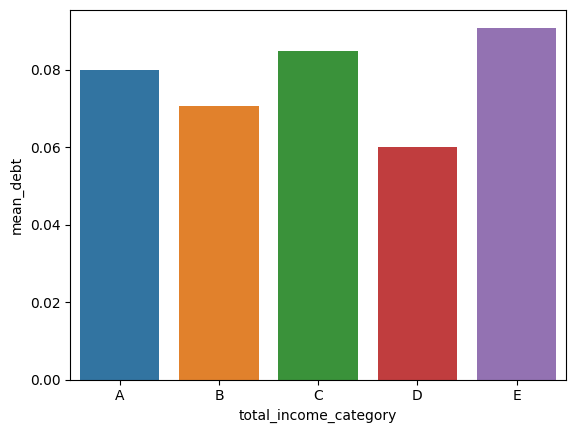

In [35]:
# вывод столбчатой диаграммы по категориям и средним значением долга - "Диаграмма 1"
seaborn.barplot(x=data_income_total['total_income_category'], y=data_income_total['mean_debt'])

<Axes: xlabel='total_income_category', ylabel='sum_total_income'>

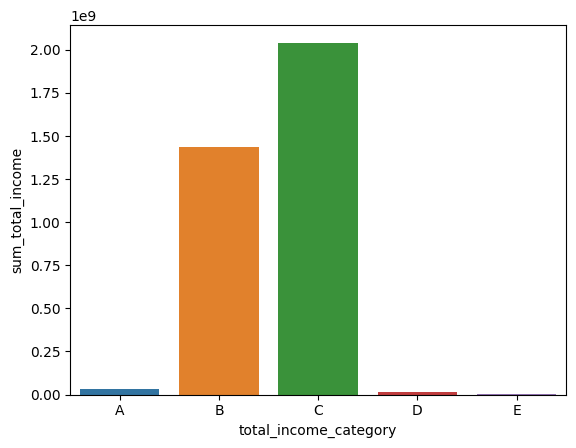

In [36]:
# вывод столбчатой диаграммы по категориям и суммарным значением дохода - "Диаграмма 2"
seaborn.barplot(x=data_income_total['total_income_category'], y=data_income_total['sum_total_income'])

<Axes: xlabel='total_income_category', ylabel='median_total_income'>

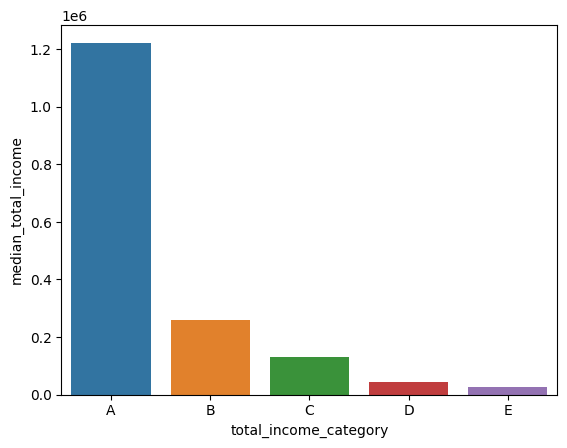

In [37]:
# вывод столбчатой диаграммы по категориям и медианным значением дохода - "Диаграмма 3"
seaborn.barplot(x=data_income_total['total_income_category'], y=data_income_total['median_total_income'])

**Вывод:**
В данном выводе не принимаются показатели по категориям А, D, E, так как по сравнению с категориями B и C они слишком малочислены, что может привести к недостоверности выводов.

Наибольшее количество людей на кредитование в категори С (доход от 50001 до 200000), на "Диаграмме 2" представлено, что по данной группе наибольший суммарный доход.

Наибольшее количество должников также в категории С и по сравнению с категорией B разница в процентном соотношении составляет почти 15%.

Зависимость между уровнем дохода и количеством должников явная, категория С больше подвержена не возврату долга в срока. Одним из факторов - средний доход на категорию, который составляют разницу с категорией В в 2 раза (см. Диаграмму 3).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [38]:
# создадис сводную таблицу
pivot_purpose_category = data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'mean'])
pivot_purpose_category.reset_index()
pivot_purpose_category.columns = ['_'.join(col).strip() for col in pivot_purpose_category.columns.values]
pivot_purpose_category = pivot_purpose_category.reset_index()
pivot_purpose_category

,purpose_category,count_debt,mean_debt
0,операции с автомобилем,4279,0.093480
1,операции с недвижимостью,10751,0.072551
2,получение образования,3988,0.092528
3,проведение свадьбы,2313,0.079118


**Вывод:** Категория "Операция с недвижимостью" и "Проведение свадьбы" меньше подвержены не оплаты долга в срок, чем категории "Получения образования" и "Операция с автомобилем". Категория "Операции с недвжимостью" более долгосрочный и связаны с жестким графиком и риском. Категория "Проведение свадьбы" менее долгосрочная и закрывается быстро.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В исходных данных имелись пропуски по колонка 'days_emloyed' и 'total_income'. Данные колонки относятся к количественным переменным. Возможные причины пропуска в данных колонках:
- человек заполнявший анкету не предоставил информацию по "количеству отработатнных дней" и "суммарный доход".
- данной информации у человека в приницпе нет, так как он может быть безработным или пенсионером.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* в количественных переменных может быть сильное различие значений, что сильно повредит аналитик при выявлении средних значений. Медиана покажет наиболее корректный показатель, так как медиана менее чувствительна к выбросам. Например, количество посетителей магазина за  3 дня до акции[50, 50, 50] и за 4 дня со значением после объявления акции [50, 50, 50, 200]. Если выполнить расчет среднего значения, то мы увидим, что проходимость выросла на 40%. Если мы применим медиану, то на выброс увеличения проходимости в 150 человек, она практически не среагирует и покажет, что проходимость как была 50 человек в день, так и осталось 50.

## Шаг 4. Общий вывод.

Основной задачей от Заказчика - необходимо разобраться влияет ли семеное положение и количество детей клиента на факт погашения кредита в срок.

Для проведения по предоставленным входным данным от Заказчика - статистика о платежеспособности клиентов, были проведены следующие действия:

- сформирована сводная таблица клиентов по категории "Дети";
- сформирована сводная таблица клиентов по категории "Семеное положение";
- сформирована сводная таблица клиентов по категории "Цель кредита";
- сформирована сводная таблица клиентов по категории "Уровень дохода".

Подробный анализ сформированных таблиц показал следующие выводы:

- наиболее благоприятной **категорией по семейному положению** является категория "Женат/замужем", так как на эту категорию приходится наименьшее количество должников. В то время как самой неблагоприятной является категория "Не женат/не замужем". Данная зависимость может быть связана с тем, что у категории людей "Женат/замужем" доход выше, так как присутсвует два основных дохода, которые могут друг друга подстраховывать.

- наиболее благоприятной **категорией по количеству детей заемщика** является категория "Без детей". Наибольшее количества выданных кредитов приходится на данную группу, а также процентное соотношение должников по данной категории почти на 20% меньше, чем у самой неблагоприятной категории "4 ребенка". Данная зависимость может быть обусловлена отсутствием дополнительных расходов у категории "Без детей".

- наиболее благоприятной **категорией по цели кредита** являются категории "Операция с недвижимостью" и "Проведение свадьбы", на данные категории приходится наименьшее количество должников. По категории "Операция с недвижимостью" зависимость может быть обусловлена тем, что данные операции являются долгосрочными и для заемщика рискованными, в виду не уплаты долго имеется риск потери недвижимость. По категории "Проведение сввадьбы" зависимость может быть обусловлена тем, что размера кредитования может быть невелик, также закрыт в кратчайшие сроки.

- наиболее благоприятной **категорией по уровню дохода** является категория "В" с заработком от 200 001 до 1 000 000. На категорию "С" с заработком от 50 001 до 200 000 приходится наибольшее количество выданных кредитов, при этом количество должников почти на 15% больше, чем по категории "В". Данная зависимость обусловлена одним из факторов -  средний суммарный доход на категорию "С" в 2 раза меньше чем у категории "С".  